# PCA code 1

In [1]:
import pandas as pd 
import numpy as np 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:

#warnings.filterwarnings(“ignore”)
#load data set URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
data = pd.read_csv(url, names=names)
x = data.drop('class',axis=1)
print("Actual Features before standardizing\n\n",x.head())
y = data['class']

Actual Features before standardizing

    sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


In [11]:
# Standardizing the features
x = StandardScaler().fit_transform(x)
print("\n")
print("After standardizing the features\n\n",x)
print("\n")




After standardizing the features

 [[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.1890

In [14]:
#covariance matrix
covar_matrix = PCA(n_components = 4)
covar_matrix.fit(x)
variance = covar_matrix.explained_variance_ratio_
#Cumulative sum of variance
var=np.cumsum(np.round(variance, decimals=3)*100)
print("Eigen values\n\n",var)


Eigen values

 [ 72.8  95.8  99.5 100. ]


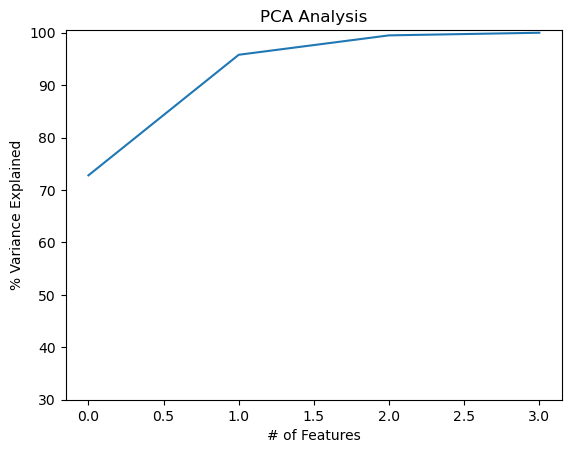

In [16]:
#plot for variance explained
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')

plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)
plt.show()


In [8]:
#fit PCA for 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
, columns = ['principal component 1', 'principal component 2'])
print("\n")
print("After Reduction of dimension into two components\n\n",principalDf.head())



After Reduction of dimension into two components

    principal component 1  principal component 2
0              -2.684207               0.326607
1              -2.715391              -0.169557
2              -2.889820              -0.137346
3              -2.746437              -0.311124
4              -2.728593               0.333925


In [20]:
#concatenate with y variable
finalDf = pd.concat([principalDf, y], axis = 1)
print("\n")
print("After concatenating with the target variable\n\n",finalDf.head())




After concatenating with the target variable

    principal component 1  principal component 2        class
0              -2.264542               0.505704  Iris-setosa
1              -2.086426              -0.655405  Iris-setosa
2              -2.367950              -0.318477  Iris-setosa
3              -2.304197              -0.575368  Iris-setosa
4              -2.388777               0.674767  Iris-setosa


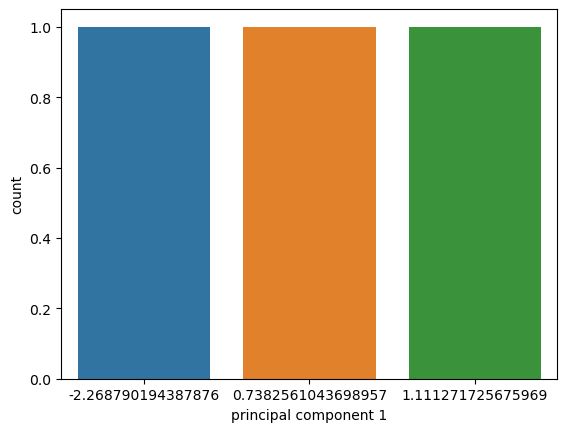

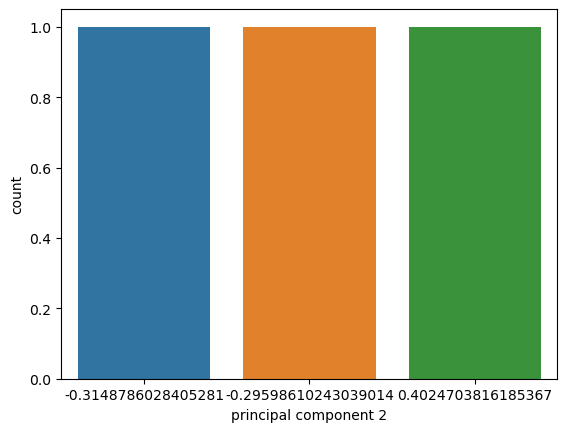

In [22]:
#Visualize the principal components
def visual(df):
    df = df.sample(3)
    ax = sns.countplot(x="principal component 1", data=df)
    plt.show()
    ax = sns.countplot(x="principal component 2", data=df)
    plt.show()

visual(finalDf)


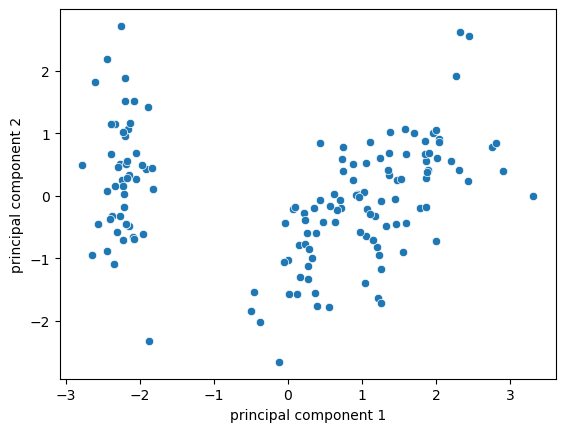



The explained variance ratio is

 [72.77045209 23.03052327]


In [23]:
#Scatter plot
ax = sns.scatterplot(x="principal component 1", y="principal component 2", data=finalDf)
plt.show()
print("\n")
#Explained variance
print("The explained variance ratio is\n\n",pca.explained_variance_ratio_*100)